<a href="https://colab.research.google.com/github/amirabehery/AMIT/blob/main/CV_Session1_skimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from skimage.io import imread, imsave, imshow
import matplotlib.pyplot as plt

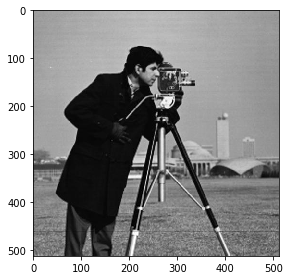

In [23]:
img = imread('/content/drive/MyDrive/Computer_Vision/camera.jpg')
imshow(img)

In [24]:
img.shape

(512, 512)

In [25]:
img.size

262144

*showing image for business use*

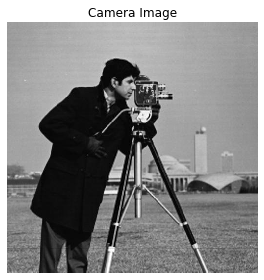

In [26]:
plt.title("Camera Image")
plt.axis("off")
imshow(img)
plt.show()

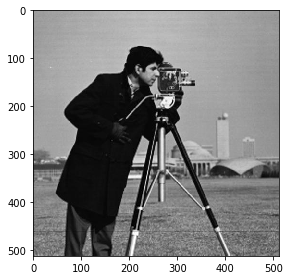

In [27]:
imshow(img)

In [28]:
img[100,200], img[100, 500]

(9, 151)

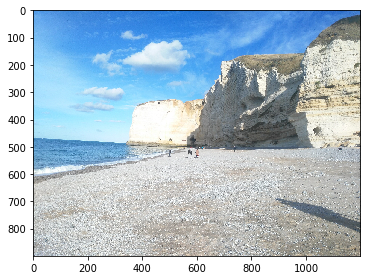

In [29]:
c_img = imread('/content/drive/MyDrive/Computer_Vision/sea.jpg')
imshow(c_img)

In [30]:
c_img.size, c_img.shape

(3240000, (900, 1200, 3))

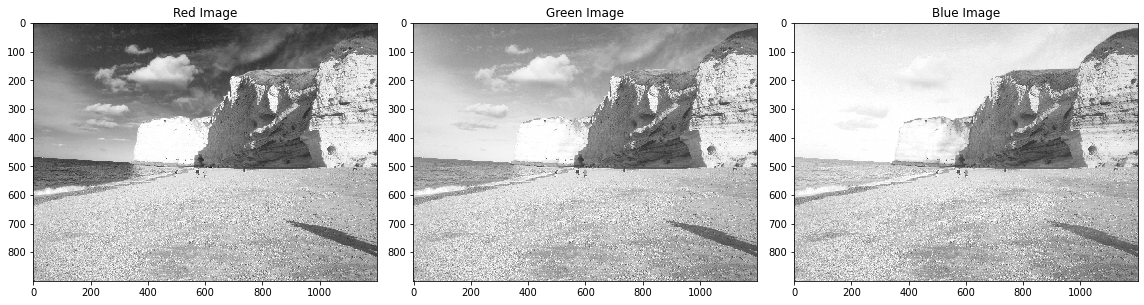

In [33]:
# Red Image ,  Green Image , Blue Image
red = c_img[:,:,0]
green = c_img[:,:,1]
blue = c_img[:,:,2]
plt.figure(figsize=(16,8))
plt.subplot(131)
imshow(red)
plt.title('Red Image')
plt.subplot(132)
imshow(green)
plt.title('Green Image')
plt.subplot(133)
imshow(blue)
plt.title('Blue Image')
plt.show()

In [34]:
from skimage import transform
import numpy as np

In [38]:
transformation_matrix = transform.SimilarityTransform(translation=(100,100))
transformation_matrix

<SimilarityTransform(matrix=
    [[  1.,  -0., 100.],
     [  0.,   1., 100.],
     [  0.,   0.,   1.]]) at 0x7fb2030f3550>

In [37]:
# another way
trans_matrix = transform.SimilarityTransform(matrix=np.array([[1,0,100],[0,1,100],[0,0,1]]))
trans_matrix

<SimilarityTransform(matrix=
    [[  1,   0, 100],
     [  0,   1, 100],
     [  0,   0,   1]]) at 0x7fb203148bb0>

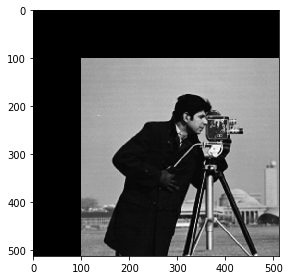

In [41]:
translated_img = transform.warp(image=img, inverse_map=transformation_matrix.inverse)
imshow(translated_img)

In [42]:
# Rotation Matrix

In [54]:
# define angle
angle = np.deg2rad(30)
cos_angle = np.cos(angle)
sin_angle = np.sin(angle)

# define Center Point
center = np.array(img.shape) // 2

# define the rotation matrix
rotation_array = np.array([[cos_angle, -1*sin_angle, 0], [sin_angle, cos_angle, 0], [0,0,1]])
rotation_matrix = transform.SimilarityTransform(matrix=rotation_array)
rotation_matrix

<SimilarityTransform(matrix=
    [[ 0.8660254, -0.5      ,  0.       ],
     [ 0.5      ,  0.8660254,  0.       ],
     [ 0.       ,  0.       ,  1.       ]]) at 0x7fb1ff9dd520>

In [51]:
rotation_form = transform.SimilarityTransform(rotation=angle)
rotation_form

<SimilarityTransform(matrix=
    [[ 0.8660254, -0.5      ,  0.       ],
     [ 0.5      ,  0.8660254,  0.       ],
     [ 0.       ,  0.       ,  1.       ]]) at 0x7fb203320d60>

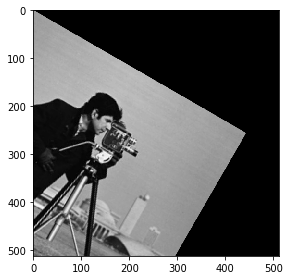

In [53]:
rot_image = transform.warp(image=img, inverse_map=rotation_matrix.inverse)
imshow(rot_image)

In [55]:
center

array([256, 256])

In [58]:
shift_center = transform.SimilarityTransform(translation=(-center[1],-center[0]))
rotation_tform = transform.SimilarityTransform(rotation=angle)
all_trans = shift_center + rotation_tform + shift_center.inverse

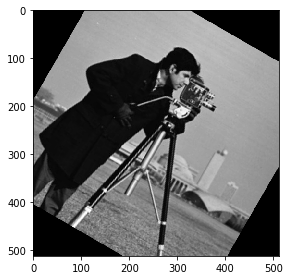

In [59]:
center_rotated_img = transform.warp(image=img, inverse_map=all_trans.inverse)
imshow(center_rotated_img)

In [60]:
# Scaling

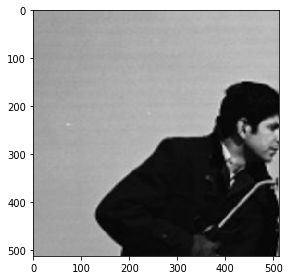

In [61]:
# scale_matrix = transform.SimilarityTransform(matrix=np.array([[sx,0,0],[0,sy,0],[0,0,1]]))
scale_matrix = transform.SimilarityTransform(scale=2)
scaled_img = transform.warp(image=img, inverse_map=scale_matrix.inverse)
imshow(scaled_img)

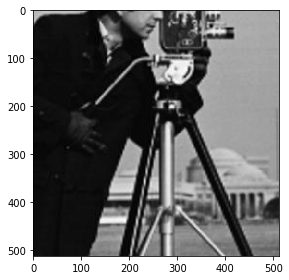

In [69]:
def scale_image(image1, scale, centered=True,*,new_center=None):
    if centered:
        if new_center:
          center = new_center
        else:
          center = np.array(image1.shape) // 2
        shift_center = transform.SimilarityTransform(translation=(-center[1],-center[0]))
        scale_matrix = transform.SimilarityTransform(scale=scale)
        scale_transform = shift_center + scale_matrix + shift_center.inverse
    else:
        scale_transform = transform.SimilarityTransform(scale=scale)
    scaled_img = transform.warp(image=image1, inverse_map=scale_transform.inverse)
    imshow(scaled_img)

scale_image(img, 2)

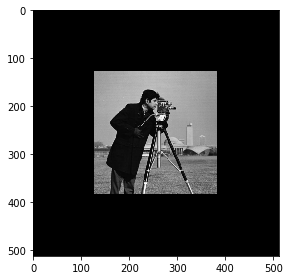

In [65]:
scale_image(img,0.5)

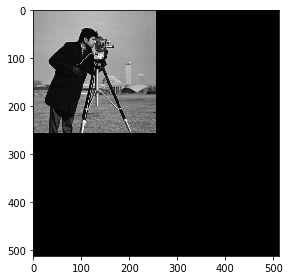

In [66]:
scale_image(img, 0.5, False)

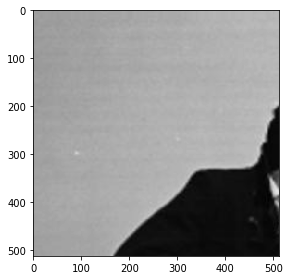

In [76]:
scale_image(img, 2.5,False, new_center = np.array([200,200]))

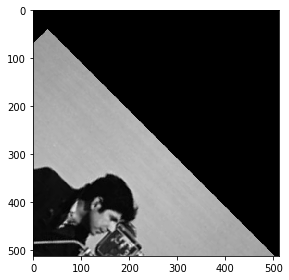

In [80]:
# augmentation of image
full_trans_matrix = transform.SimilarityTransform(translation=(30,40), rotation=np.deg2rad(45), scale=1.5)
new_trans_image = transform.warp(image=img, inverse_map=full_trans_matrix.inverse)
imshow(new_trans_image)

In [81]:
# mirroring of Image

In [82]:
# histogram to capture the distribution of gray levels in the image

In [91]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [92]:
img = cv2.imread('/content/drive/MyDrive/Computer_Vision/camera.jpg')

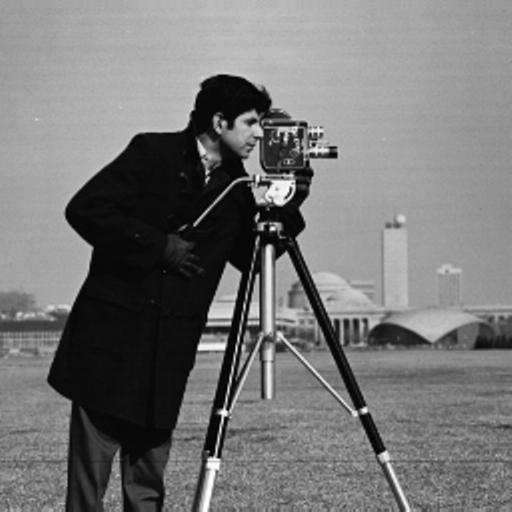

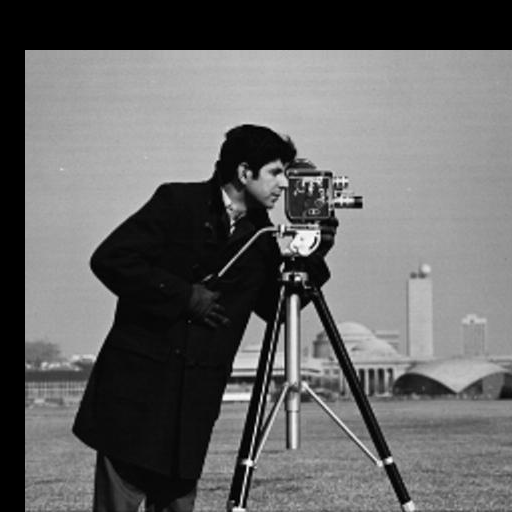

In [93]:
# load the image and display it to our screen
cv2_imshow(img)
# shift the image 25 pixels to the right and 50 pixels down
M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2_imshow(shifted)

In [94]:
def translate_image(image, xdistance, ydistance):
    cv2_imshow(image)
    trans_matrix = np.float32([[1, 0, xdistance], [0, 1, ydistance]])
    shifted_image = cv2.warpAffine(image, trans_matrix, (image.shape[1], image.shape[0]))
    cv2_imshow(shifted_image)

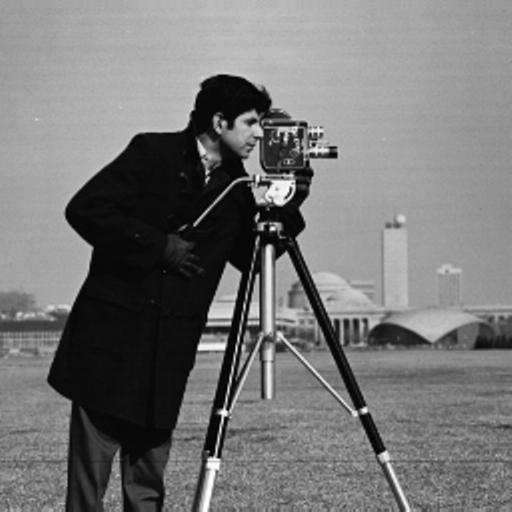

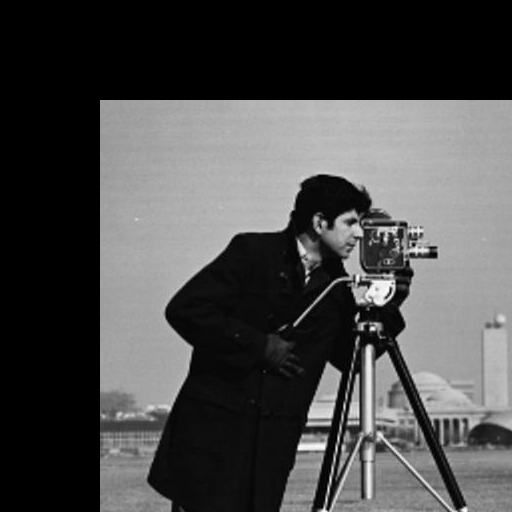

In [95]:
translate_image(img, 100, 100)

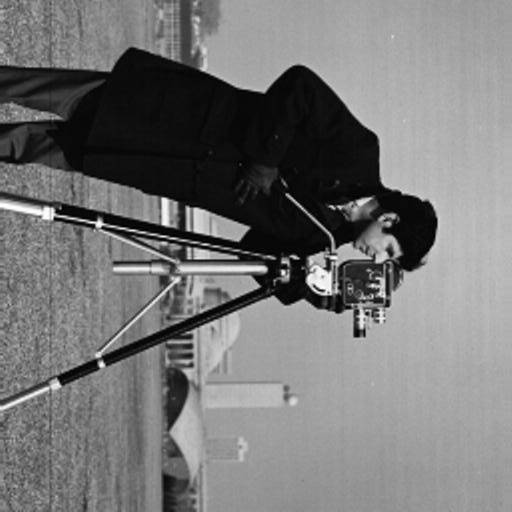

In [99]:
rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
# rotated_img = cv2.rotate(img, cv2.ROTATE_180)
cv2_imshow(rotated_img)

Original Dimensions :  (512, 512, 3)
Resized Dimensions :  (256, 256, 3)


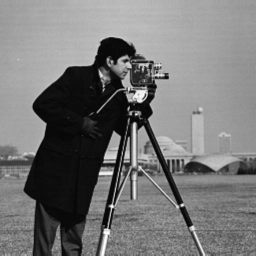

In [101]:
print('Original Dimensions : ',img.shape)

scale_percent = 50
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
 
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

print('Resized Dimensions : ',resized.shape)

cv2_imshow(resized)

In [103]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  cv2_imshow(result)

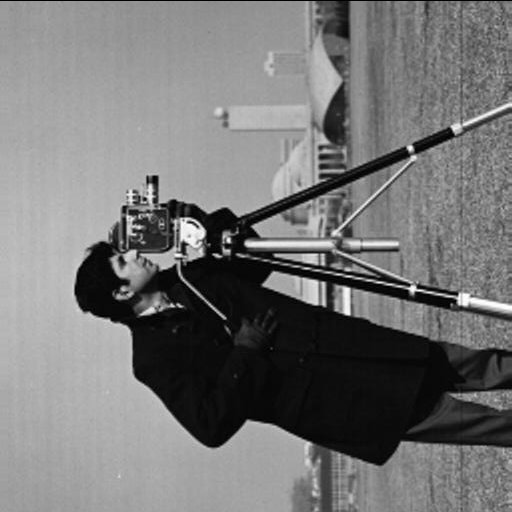

In [104]:
rotate_image(img, 90)

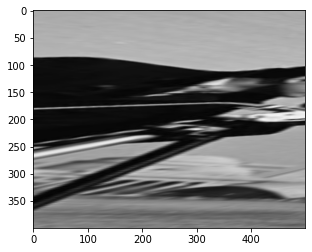

In [111]:
pts1 = np.float32([[63,80],[100,8],[380,400],[500,400]])
pts2 = np.float32([[0,0],[500,0],[0,400],[500,400]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(500,400))
plt.imshow(dst)

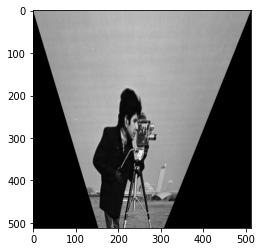

In [112]:
rows, cols = img.shape[:2]
initial_points = np.float32([[0,0],[cols-1,0],[0,rows-1],[cols-1,rows-1]])
final_points = np.float32([[0,0],[cols-1,0],[int(0.30*cols),rows-1],[int(0.60*cols),rows-1]])
matrix = cv2.getPerspectiveTransform(initial_points,final_points)
perspective = cv2.warpPerspective(img,matrix,(cols,rows))

plt.imshow(perspective)